This script rips zalando for sweaters and sorts the results based in wool content in the sweaters

In [41]:
from __future__ import print_function, division
import urllib2
from bs4 import BeautifulSoup
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("bmh")
mpl.rcParams['figure.figsize'] = [12, 8]
from multiprocessing.dummy import Pool
%matplotlib inline

In [39]:
mpl.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [2]:
def getPageSoup(pg):
    baseUrl = 'https://www.zalando.dk/herretoej-sweatere-og-strikjakker/?price_to=500&upper_material=kashmir.mohair.uld&order=price&dir=asc'
    # html = urllib2.urlopen(baseUrl % pg).read()
    html = urllib2.urlopen(baseUrl).read()
    return BeautifulSoup(html, 'lxml')

In [3]:
soup = getPageSoup(1)

In [4]:
soup = BeautifulSoup(urllib2.urlopen('https://www.zalando.dk/herretoej-sweatere-og-strikjakker/?upper_material=uld&shirt_collar=sjalskrave&order=price&dir=asc').read(), 'lxml')

In [5]:
def getPageProducts(soup):
    searchBox = soup.find('ul', class_='catalogArticlesList  threeCol main')
    productList = searchBox.findAll('a', class_='catalogArticlesList_productBox')
    productLinks = ['https://www.zalando.dk' + a.attrs['href'] for a in productList]
    return productLinks

In [6]:
productLinks = getPageProducts(soup)

In [7]:
def getProductSoup(url):
    html = urllib2.urlopen(url).read()
    return BeautifulSoup(html, 'lxml')

In [18]:
def getWollContent(soup):
    productInfo = soup.find('div', attrs={'id': 'productDetails', 'class': 'span6'})
    if productInfo != None:
        ul = productInfo.find('ul')
        rx = re.compile(r'.*?(\d+)\s*\% uld.*?')
        for ln in ul.text.splitlines():
            m = rx.match(ln)
            if m:
                return int(m.groups()[0].strip())
        return -1

In [19]:
print('42 Oh my 42')

42 Oh my 42


In [20]:
pageSoup = getPageSoup(1)
productLinks = getPageProducts(pageSoup)

In [21]:
def poolFunction(pd):
    try:
        prodSoup = getProductSoup(pd)
        woolCont = getWollContent(prodSoup)
        return (woolCont, pd)
    except AttributeError as e:
        print('Failed at URL %s ' % pd)
        print(e)
        return -1

In [23]:
pool = Pool(processes=4)

In [24]:
aggregateList = pool.map(poolFunction, productLinks)

In [26]:
len(aggregateList)

72

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

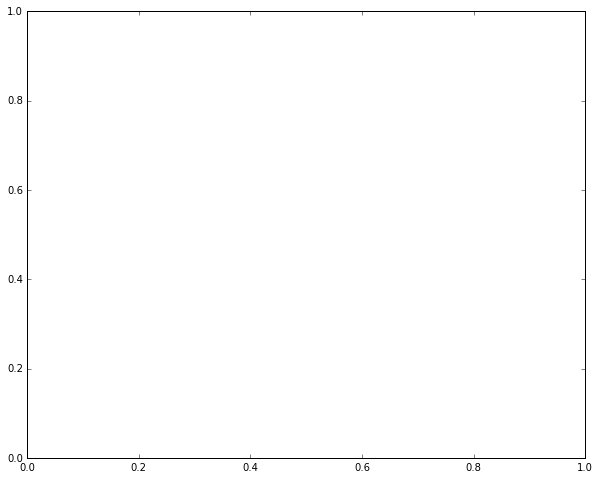

In [27]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
pct = [el[0] for el in aggregateList]
plt.hist(pct, 100);
plt.xticks(range(0, 101, 5));
plt.xlabel('% wool');
plt.ylabel('# products');

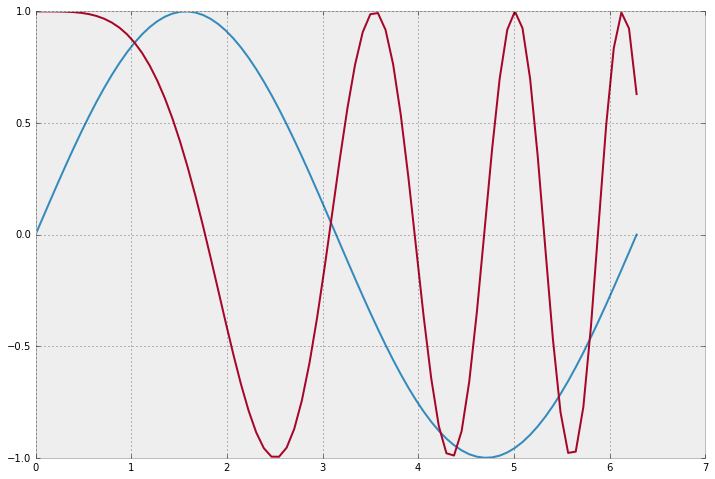

In [43]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))
x = np.linspace(0, 2*np.pi, 80)
y1 = np.sin(x)
y2 = np.cos((x**2)/2)
ax.plot(x, y1)
ax.plot(x, y2)
plt.show()

In [44]:
with open('woolen_sweaters_urls.txt', 'w') as fid:
    map(lambda x: print(x[1], file=fid), sorted([el for el in aggregateList if el[0] > 50], key=lambda x: x[0], reverse=True));
map(lambda x: print(x[1]), sorted([el for el in aggregateList if el[0] > 50], key=lambda x: x[0], reverse=True));

https://www.zalando.dk/pier-one-strikpullover-striktrojer-bordeaux-pi922qa07-g11.html
https://www.zalando.dk/pier-one-strikpullover-striktrojer-black-pi922qa07-q11.html
https://www.zalando.dk/pier-one-strikpullover-striktrojer-dark-grey-melange-pi922qa08-c12.html
https://www.zalando.dk/pier-one-strikpullover-striktrojer-bordeaux-pi922qa08-g11.html
https://www.zalando.dk/kiomi-strikpullover-striktrojer-navy-k4422qa04-k11.html
https://www.zalando.dk/kiomi-strikpullover-striktrojer-black-k4422qa04-q11.html
https://www.zalando.dk/benetton-strikpullover-striktrojer-black-4be22q026-q11.html
https://www.zalando.dk/benetton-strikpullover-striktrojer-black-4be22q028-q11.html
https://www.zalando.dk/gap-strikpullover-striktrojer-navy-gp022q015-k11.html
https://www.zalando.dk/gap-strikpullover-striktrojer-charcoal-grey-gp022q015-q11.html
https://www.zalando.dk/gap-strikpullover-striktrojer-true-black-gp022q015-q12.html
https://www.zalando.dk/gap-strikpullover-striktrojer-medium-grey-gp022q015-c11.

In [45]:
map(lambda x:print(x[1]), [el for el in aggregateList if el[0] == 50]);

https://www.zalando.dk/kiomi-strikpullover-striktrojer-navy-k4422qa0s-k11.html
https://www.zalando.dk/kiomi-strikpullover-striktrojer-dark-grey-k4422qa0s-c11.html
https://www.zalando.dk/lindbergh-strikpullover-striktrojer-black-lg522q00e-q11.html
https://www.zalando.dk/lindbergh-strikpullover-striktrojer-bordeaux-lg522q00e-g11.html
https://www.zalando.dk/lindbergh-strikpullover-striktrojer-navy-lg522q00e-k11.html
https://www.zalando.dk/dickies-shaftsburg-strikpullover-striktrojer-di622q000-q11.html
https://www.zalando.dk/dickies-shaftsburg-strikpullover-striktrojer-bla-di622q000-k11.html


In [46]:
# import webbrowser
# map(lambda x: webbrowser.open_new_tab(x[1]), [el for el in aggregateList if el[0] > 50])